DOWNLOAD DATA<br>
Boiler plate code to download images 

In [30]:
import os
import torch
import torchvision
from torchvision.datasets.utils import download_url
import zipfile

train_path = 'train'
dl_file = 'dl2018-image-proj.zip'
dl_url = 'https://users.aalto.fi/mvsjober/misc/'

zip_path = os.path.join(train_path, dl_file)
if not os.path.isfile(zip_path):
    download_url(dl_url + dl_file, root=train_path, filename=dl_file, md5=None)

with zipfile.ZipFile(zip_path) as zip_f:
    zip_f.extractall(train_path)
    #os.unlink(zip_path)

KeyboardInterrupt: 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#FAST AI LIBRARIES
from fastai import *
from fastai.vision import *

#OTHER LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import PIL

# workaround 
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions


print(PIL.PILLOW_VERSION)

5.3.0


Setting Training Path

In [2]:
PATH = "train/images/"

Displaying Image functions

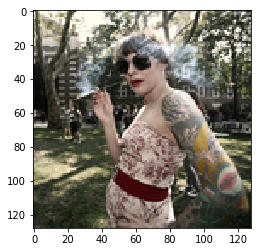

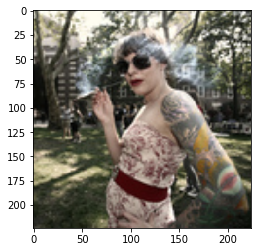

In [3]:
img=mpimg.imread(f'{PATH}/im1.jpg')
imgplot = plt.imshow(img)
plt.show()

im = cv2.imread(f'{PATH}/im1.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

# Data Analysis and Pre-processing

In [4]:
# check all the classes

from os import listdir
from os.path import isfile, join
classes = [f[:-4] for f in listdir('train/annotations/') if isfile(join('train/annotations/', f))]

In [5]:
classes

['baby',
 'bird',
 'car',
 'clouds',
 'dog',
 'female',
 'flower',
 'male',
 'night',
 'people',
 'portrait',
 'river',
 'sea',
 'tree']

In [20]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [21]:
# distribution of the classes
path='train/annotations/'

dist = dict([(f'{f[:-4]}',file_len(f'{path}{f}')) for f in listdir(path) if isfile(join(path, f))])
            
            

In [22]:
dist

{'baby': 95,
 'bird': 360,
 'car': 319,
 'clouds': 1095,
 'dog': 448,
 'female': 3227,
 'flower': 761,
 'male': 2979,
 'night': 598,
 'people': 6403,
 'portrait': 3121,
 'river': 120,
 'sea': 173,
 'tree': 525}

<BarContainer object of 14 artists>

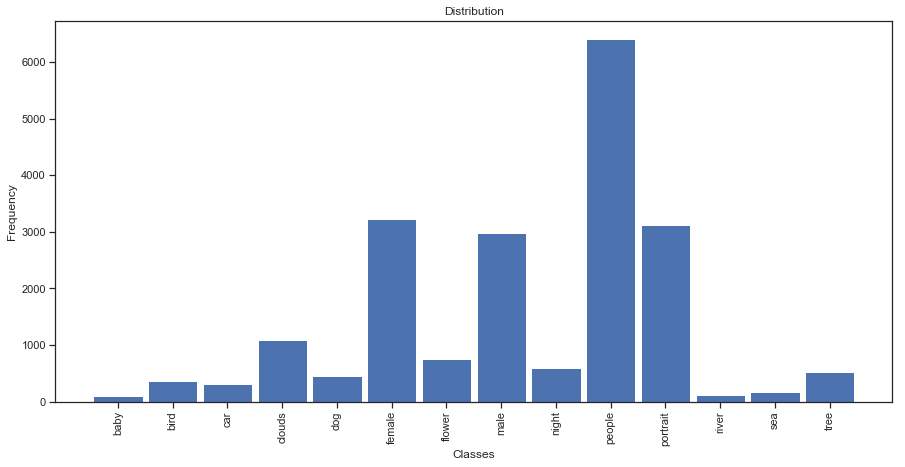

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Classes")
plt.title(f"Distribution")
plt.bar(dist.keys(), dist.values(), width=0.9, color='b')

The dataset is imbalanced

In [24]:
# sort all the images from im1....imn
file_col = listdir("train/images")
list1 = [int(x[2:len(x)-4]) for x in file_col if x[0]=='i']
list1.sort()
listfin = ["train/images/im"+str(num)+".jpg" for num in list1]

file_col = pd.Series(listfin)

# creation of the dataframe 
df = pd.DataFrame()
df["fileName"] = file_col

path = "train/annotations"

row = 0

# file dic contains how many samples there are for each class. Is it needed?
file_dic = {}

for label, filename in enumerate(listdir(path)):
  # array of zeros (20000,) that will be one column of the df
  tmp = np.zeros(file_col.shape[0], dtype=int)
  with open(path+"/"+filename, "r") as file:
    file_len = 0
    for line in file:
      # get the line that contains that image
      line = line.replace("\n", "")
      line = int(line)
      tmp[line-1] = 1   # set 1 for the image that contains that class 
      file_len = file_len + 1
  filename = filename[:-4]
  tmp = pd.Series(tmp)
  df[filename] = tmp
  file_dic[filename] = file_len

print(file_dic)

{'baby': 95, 'bird': 360, 'car': 319, 'clouds': 1095, 'dog': 448, 'female': 3227, 'flower': 761, 'male': 2979, 'night': 598, 'people': 6403, 'portrait': 3121, 'river': 120, 'sea': 173, 'tree': 525}


In [25]:
for k in df.columns[1:]:print(k)

baby
bird
car
clouds
dog
female
flower
male
night
people
portrait
river
sea
tree


In [26]:
def vec2label (df):
  l = []
  for i in range(df.shape[0]):
    p = []
    for k in df.columns[1:]:
      if df.iloc[i][f'{k}']:
        p.append(k)
    l.append(p)
  l = pd.Series(l)
  return l

df['classes']= vec2label(df)

In [27]:
df.to_csv("data.csv")

In [28]:
df

,fileName,baby,bird,car,clouds,dog,female,flower,male,night,people,portrait,river,sea,tree,classes
0,train/images/im1.jpg,0,0,0,0,0,1,0,0,0,1,1,0,0,0,"[female, people, portrait]"
1,train/images/im2.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[]
2,train/images/im3.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[]
3,train/images/im4.jpg,0,0,0,0,0,0,0,1,0,1,0,0,0,0,"[male, people]"
4,train/images/im5.jpg,0,0,0,0,0,0,0,1,0,1,0,0,0,0,"[male, people]"
5,train/images/im6.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[]
6,train/images/im7.jpg,0,0,0,0,0,1,0,0,0,1,0,0,0,0,"[female, people]"
7,train/images/im8.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[]
8,train/images/im9.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[]
9,train/images/im10.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[]


In [29]:
def dataformatter(df,out=None):
    op = df
    op['img'] = df['fileName'].apply(lambda x: x[13:-4])
    op['tags'] = df.iloc[:,15]
    op['tags'] = df['tags'].apply(lambda x: ' '.join(str(p) for p in x))
    op=op[['img','tags']]
    print(op.head())
    op.to_csv(f'{out}.csv', header=False,index=False)

dataformatter(df,out='labels')

   img                    tags
0  im1  female people portrait
1  im2                        
2  im3                        
3  im4             male people
4  im5             male people


In [30]:
torch.cuda.is_available()

True

In [31]:
PATH = '.'

In [32]:
!dir {PATH}

 Volume in drive D is DATA
 Volume Serial Number is 5612-169F

 Directory of D:\KZ\Projects\Deep-Learning-Project-UH18

06/01/2019  17.57    <DIR>          .
06/01/2019  17.57    <DIR>          ..
05/01/2019  00.21    <DIR>          .git
31/12/2018  13.09               180 .gitignore
02/01/2019  23.40    <DIR>          .ipynb_checkpoints
06/01/2019  17.57         1 426 588 data.csv
03/01/2019  18.28           519 730 Deep_Learning_Project_DATA_PROCESSING.ipynb
02/01/2019  04.59           546 477 Deep_Learning_Project_DATA_PROCESSING_prove.ipynb
06/01/2019  17.57         1 962 148 Deep_Learning_Project_FASTAI.ipynb
31/12/2018  22.05        70 274 086 dl2018-image-test.zip
05/01/2019  00.14    <DIR>          FAST.AI
31/12/2018  13.09           415 290 ImageProject.ipynb
23/11/2017  11.19    <DIR>          images
06/01/2019  17.57           315 072 labels.csv
04/01/2019  23.36    <DIR>          models
31/12/2018  13.09               183 README.md
31/12/2018  13.09    <DIR>          report

### DATA AUGMENTATION
HORIZONTAL FLIP, VERTICAL FLIP, ZOOM, WARP AND ROTATE

In [33]:
tfms = get_transforms(do_flip=True,flip_vert=True, max_zoom=1.05, max_warp=0.,max_rotate=25)
data = (ImageItemList.from_csv(PATH, 'labels.csv',sep=' ', folder='train\images', suffix='.jpg')
        .random_split_by_pct()
        .label_from_df(sep=' ')
        .transform(tfms, size=128)
        .databunch(bs=64)
        .normalize(imagenet_stats))

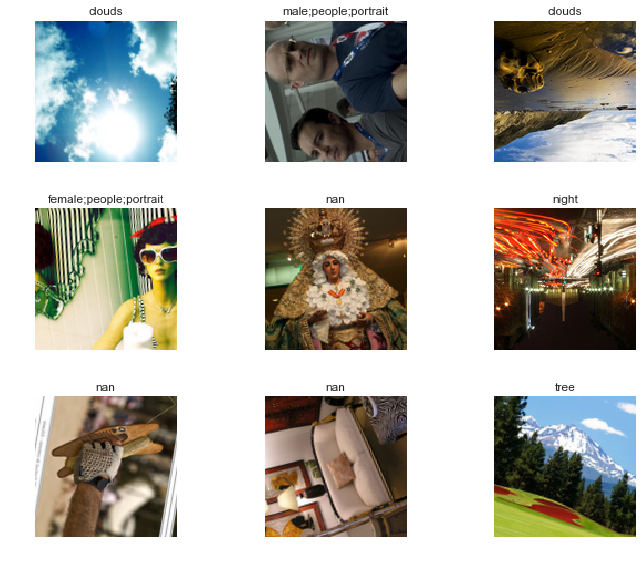

In [34]:
data.show_batch(rows=3, figsize=(10,8))


items without classes are shown as nan

# TRAINING


### RESNET18
batchsize = 64 <br>
valid size ~ 20 % <br>

Finding best learning rate using lr.find

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


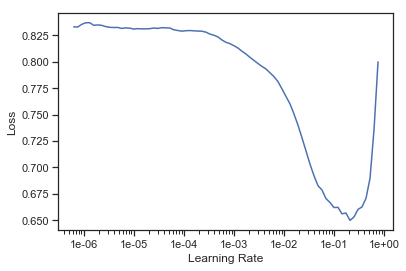

In [37]:
#beta is set to 1 in the lib packages
model = create_cnn(data, models.resnet18, metrics=[accuracy_thresh, fbeta])
model.unfreeze()
model.lr_find()
model.recorder.plot()


learning rate ~ (initial layers: 1e-04, final layer: 1e-015) <br>
unfreezing the layers and using the pretrained model<br>
accuracy_thresh >= (0.5)

In [38]:

model.fit_one_cycle(25,max_lr=slice(1e-04,1e-02))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.262959,0.153452,0.942686,0.697273
2,0.154932,0.126251,0.948704,0.720247
3,0.147360,0.130466,0.947370,0.718978
4,0.151642,0.140951,0.941485,0.684630
5,0.155083,0.151070,0.937601,0.689012
6,0.156343,0.154698,0.937785,0.673887
7,0.153690,0.154589,0.936517,0.690764
8,0.152699,0.165620,0.932750,0.657254
9,0.152920,0.146548,0.939285,0.689361
10,0.145830,0.144727,0.942719,0.697816


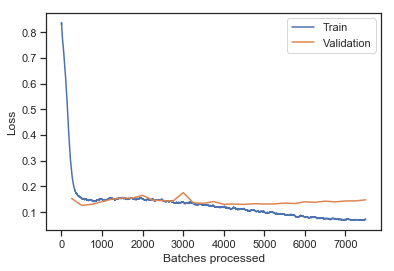

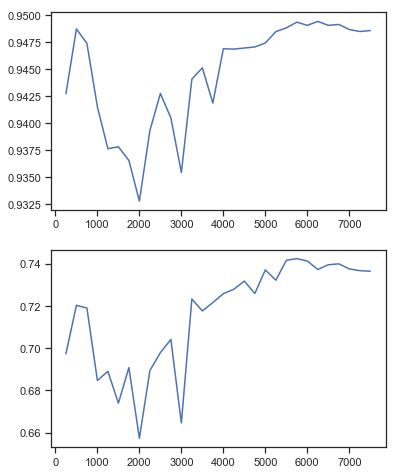

In [39]:
model.recorder.plot_losses()
model.recorder.plot_metrics()


In [57]:
model.save('dlcompetition_resnet18_full')

In [42]:
model.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList
y: MultiCategoryList (16000 items)
[MultiCategory nan, MultiCategory nan, MultiCategory male;people, MultiCategory nan, MultiCategory female;people]...
Path: .
x: ImageItemList (16000 items)
[Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128)]...
Path: .;

Valid: LabelList
y: MultiCategoryList (3999 items)
[MultiCategory flower;tree, MultiCategory nan, MultiCategory nan, MultiCategory clouds, MultiCategory nan]...
Path: .
x: ImageItemList (3999 items)
[Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128), Image (3, 128, 128)]...
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, pad

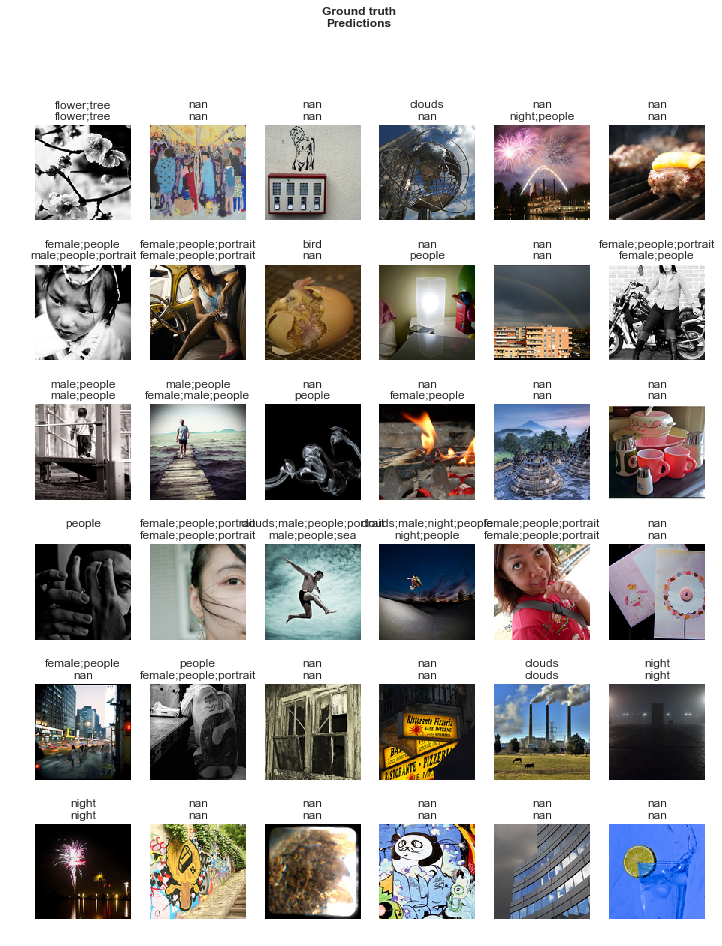

In [41]:
model.show_results(rows=6, figsize=(12,15))


### RESNET152

batchsize = 64 <br>
valid size ~ 20 % <br>

Finding best learning rate using lr.find

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


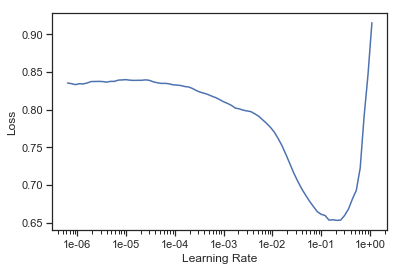

In [59]:
#beta is set to 1 in the lib packages
model = create_cnn(data, models.resnet152, metrics=[accuracy_thresh, fbeta])
model.unfreeze()
model.lr_find()
model.recorder.plot()


learning rate ~ (initial layers: 1e-04, final layer: 1e-015) <br>
unfreezing the layers and using the pretrained model<br>
accuracy_thresh >= (0.5)

In [62]:
model.fit_one_cycle(5,max_lr=slice(1e-04,1e-02))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.183092,0.173683,0.932367,0.662244
2,0.178450,0.163826,0.934167,0.645172
3,0.162477,0.148698,0.939018,0.662650
4,0.146373,0.132209,0.944920,0.708394
5,0.134620,0.127452,0.946620,0.719533


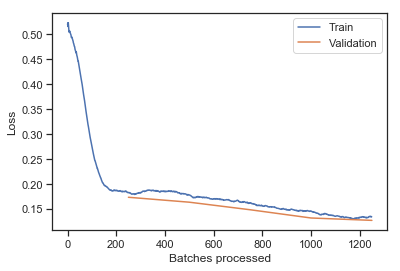

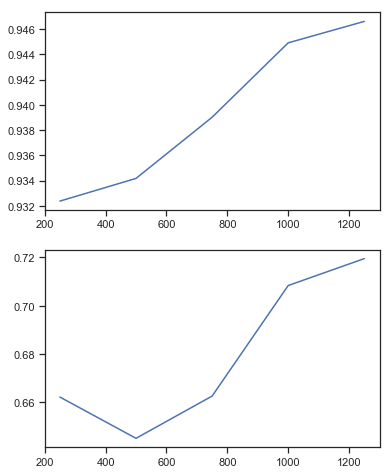

In [63]:
model.recorder.plot_losses()
model.recorder.plot_metrics()


In [67]:
model.save('dlcompetition_resnet152_full')

training for 3 more epochs

In [68]:
model = create_cnn(data, models.resnet152, metrics=[accuracy_thresh, fbeta]).load('dlcompetition_resnet152_full')
model.fit_one_cycle(3,max_lr=slice(1e-04,1e-02))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.132437,0.132808,0.945970,0.702203
2,0.127413,0.129253,0.947037,0.718301
3,0.124316,0.124674,0.948170,0.724525


In [69]:
model.save('dlcompetition_resnet152_full')

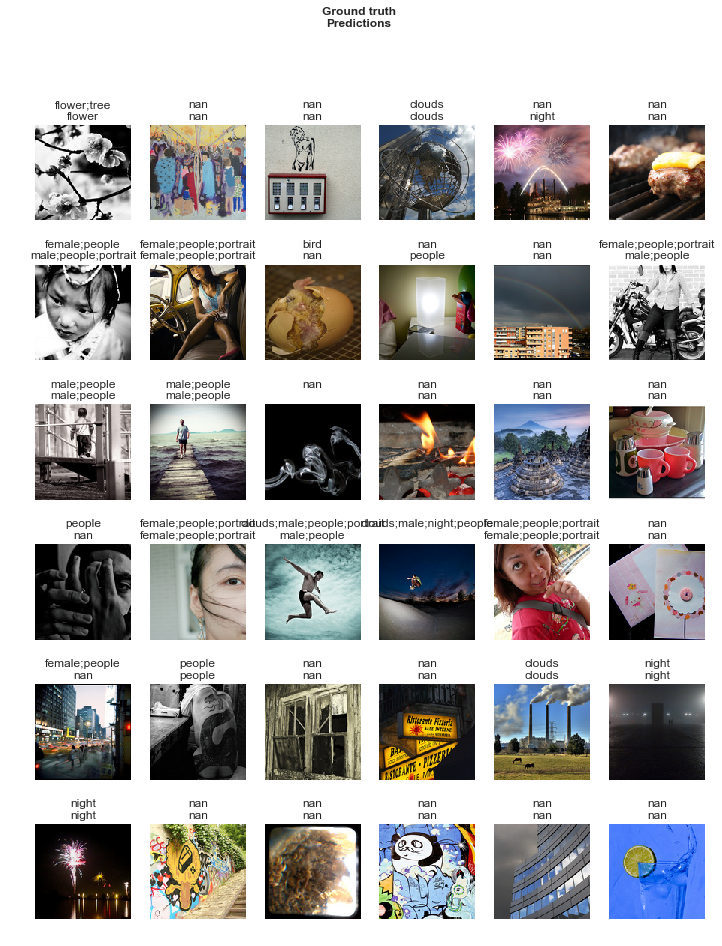

In [70]:
model.show_results(rows=6, figsize=(12,15))

# INFERENCE


### RESNET18

In [43]:
learn = create_cnn(data, models.resnet18).load('dlcompetition_resnet18_full')
data_test = ImageItemList.from_folder('test/images')
preds,y = learn.get_preds(data_test)
np.savetxt('results_resnet18.txt', y, fmt='%d')

In [47]:
len(classes)

14

In [48]:
print(data.classes)
len(data.classes),data.c

['baby', 'bird', 'car', 'clouds', 'dog', 'female', 'flower', 'male', 'nan', 'night', 'people', 'portrait', 'river', 'sea', 'tree']


(15, 15)

### RESNET152

In [ ]:
learn = create_cnn(data, models.resnet152).load('dlcompetition_resnet152_full')
preds,y = learn.get_preds(data_test)
np.savetxt('results_resnet152.txt', y, fmt='%d')